<a href="https://colab.research.google.com/github/preetamjumech/cuDF_pandas/blob/main/cuDF_Pandas_Large_Data_Preprocessing_with_cuDF_pandas_accelerator_mode_13_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi  # this should display information about available GPUs

Wed Nov 13 13:07:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Download the dataset through kaggle API-
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024
#unzip the file to access contents
!unzip 1-3m-linkedin-jobs-and-skills-2024.zip

Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100% 1.87G/1.88G [00:09<00:00, 278MB/s]
100% 1.88G/1.88G [00:09<00:00, 211MB/s]
Archive:  1-3m-linkedin-jobs-and-skills-2024.zip
  inflating: job_skills.csv          
  inflating: job_summary.csv         
  inflating: linkedin_job_postings.csv  


In [3]:
import pandas as pd

In [4]:
%%time
job_summary_df = pd.read_csv("job_summary.csv")
print("Dataset Size (in GB):",round(job_summary_df.memory_usage(
    deep=True).sum()/(1024**3),2))

Dataset Size (in GB): 8.19
CPU times: user 1min, sys: 6.92 s, total: 1min 7s
Wall time: 1min 11s


In [5]:
job_summary_df.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...


In [6]:
# Calculate memory usage of each column in GB
memory_usage_bytes = job_summary_df.memory_usage(deep=True)
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("`job_summary` column size (in GB):", round(memory_usage_gb['job_summary'],1),
     "\n","`job_summary` column number of characters (in Bn):",
      round(job_summary_df['job_summary'].str.len().sum()/(10**9),2))

`job_summary` column size (in GB): 8.0 
 `job_summary` column number of characters (in Bn): 4.95


In [7]:
%%time
job_skills_df = pd.read_csv("job_skills.csv")
job_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB
CPU times: user 9.92 s, sys: 1.09 s, total: 11 s
Wall time: 12.4 s


In [8]:
job_skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [9]:
%%time
job_postings_df = pd.read_csv("linkedin_job_postings.csv")
job_postings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB
CPU times: user 8.72 s, sys:

In [10]:
job_postings_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [11]:
%%time
job_summary_df['summary_length'] = job_summary_df['job_summary'].str.len()
job_summary_df['summary_length'].head()

CPU times: user 912 ms, sys: 41.3 ms, total: 953 ms
Wall time: 1.08 s


,summary_length
0,957
1,3816
2,5314
3,2774
4,2749


In [12]:
%%time
df_merged=pd.merge(job_postings_df, job_summary_df, how="left", on="job_link")

CPU times: user 2.79 s, sys: 222 ms, total: 3.01 s
Wall time: 3.14 s


In [13]:
%%time
df_merged.groupby(['company',"job_title"]).agg({
    "summary_length":"mean"}).sort_values(by='summary_length', ascending = False).fillna(0)

CPU times: user 3.49 s, sys: 46.2 ms, total: 3.54 s
Wall time: 3.96 s


summary_length
company                        job_title                                                         
ClickJobs.io                   Adolescent Behavioral Health Therapist - Substa...         23748.0
Mt. San Antonio College        Chief, Police and Campus Safety                            22998.0
CareerBeacon                   Airside/Groundside Project Manager [Halifax Int...         22938.0
Tacoma Community College       Anthropology Professor - Part-time                         22790.0
IRS, Office of Chief Counsel   Program Analyst (12-Month Roster)                          22774.0
...                                                                                           ...
鴻海精密工業股份有限公司                   HR Specialist - Payroll & Benefit                              0.0
                               Material Planner                                               0.0
                               RFQ Specialist                                                 0.0
                               Supply Chain Program Manager                                   0.0
🌟Daniel-Scott Recruitment Ltd🌟 IT Manager                                                     0.0

[801276 rows x 1 columns]

In [14]:
%%time
# Group by company, job_title, and month, and calculate the mean of summary_length
grouped_df = df_merged.groupby(['job_title', 'job_location']).agg({'summary_length': 'mean'})

# Reset index to sort by job_title and month
grouped_df = grouped_df.reset_index()

# Sort by job_title and month
sorted_df = grouped_df.sort_values(by=['job_title', 'job_location','summary_length'],
                                   ascending=False).reset_index(drop=True).fillna(0)
sorted_df

CPU times: user 6.57 s, sys: 75.8 ms, total: 6.65 s
Wall time: 6.94 s


,job_title,job_location,summary_length
0,"🔥Nurse Manager, Patient Services - Operating Room","Lake George, NY",7342.0
1,🔥Behavioral Health RN 3 12s,"Glens Falls, NY",2787.0
2,🔥 Surgical Technologist - Evenings,"Lake George, NY",2920.0
3,🔥 Physician Practice Clinical Lead RN,"Saratoga Springs, NY",2945.0
4,🔥 Physican Practice LPN - Green,"Lake George, NY",2969.0
...,...,...,...
1104106,"""Attorney"" (Gov Appt/Non-Merit) Jobs","Kentucky, United States",2427.0
1104107,"""Accountant""","Shavano Park, TX",1497.0
1104108,"""Accountant""","Basking Ridge, NJ",1073.0
1104109,"""Accountant""","Austin, TX",1993.0


In [15]:
# isolating records for the specific job role across various location
job_title_acc=sorted_df[sorted_df['job_title'] == 'LEAD SALES ASSOCIATE-FT'].reset_index(
    drop=True)[1:15]

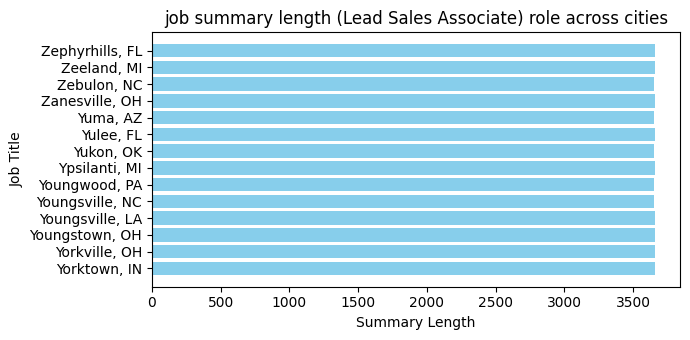

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3.5))
plt.barh(job_title_acc['job_location'],job_title_acc['summary_length'], color='skyblue')
plt.xlabel('Summary Length')
plt.ylabel('Job Title')
plt.title('job summary length (Lead Sales Associate) role across cities')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.tight_layout()
plt.show()

# Analysis with cuDF Pandas

In [17]:
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12==24.8.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.8/517.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: rmm-cu12
    Found existing installation: rmm-cu12 24.10.0
    Uninstalling rmm-cu12-24.10.0:
      Successfully uninstalled rmm-cu12-24.10.0
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 24.10.1
    Uninstalling cudf-cu12-24.10.1:
      Successfully uninstalled cudf-cu12-24.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcudf-cu12 24.10.

In [1]:
get_ipython().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

In [2]:
%load_ext cudf.pandas
import pandas as pd

In [5]:
%time
job_summary_df = pd.read_csv("job_summary.csv")
print("Dataset Size (in GB):",round(job_summary_df.memory_usage(
    deep=True).sum()/(1024**3),2))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Dataset Size (in GB): 4.76


In [6]:
%%time
job_skills_df = pd.read_csv("job_skills.csv")
job_postings_df = pd.read_csv("linkedin_job_postings.csv")

CPU times: user 591 ms, sys: 95.5 ms, total: 687 ms
Wall time: 662 ms


In [7]:
%%time
job_summary_df['summary_length'] = job_summary_df['job_summary'].str.len()
job_summary_df['summary_length'].head()

CPU times: user 25.6 ms, sys: 7.96 ms, total: 33.6 ms
Wall time: 61.9 ms


,summary_length
0,957
1,3816
2,5314
3,2774
4,2749


In [8]:
%%time
df_merged=pd.merge(job_postings_df, job_summary_df, how="left", on="job_link")
df_merged.head()

CPU times: user 235 ms, sys: 98.9 ms, total: 334 ms
Wall time: 564 ms


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,summary_length
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,Responsibilities\nJob Description Summary\nJob...,4602
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,Employment Type:\nFull time\nShift:\nDescripti...,2950
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,Job Details\nDescription\nWhat You'll Do\nAs a...,4571
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,Who We Are\nRand Realty is a family-owned brok...,3944
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,<NA>,<NA>


In [9]:
%%time
df_merged.groupby(['company',"job_title"]).agg({
    "summary_length":"mean"}).sort_values(by='summary_length', ascending = False).fillna(0)

CPU times: user 487 ms, sys: 531 ms, total: 1.02 s
Wall time: 1.2 s


summary_length
company                        job_title                                                         
ClickJobs.io                   Adolescent Behavioral Health Therapist - Substa...         23748.0
Mt. San Antonio College        Chief, Police and Campus Safety                            22998.0
CareerBeacon                   Airside/Groundside Project Manager [Halifax Int...         22938.0
Tacoma Community College       Anthropology Professor - Part-time                         22790.0
IRS, Office of Chief Counsel   Program Analyst (12-Month Roster)                          22774.0
...                                                                                           ...
鴻海精密工業股份有限公司                   HR Specialist - Payroll & Benefit                              0.0
                               Material Planner                                               0.0
                               RFQ Specialist                                                 0.0
                               Supply Chain Program Manager                                   0.0
🌟Daniel-Scott Recruitment Ltd🌟 IT Manager                                                     0.0

[801276 rows x 1 columns]

In [10]:
%%time
# Group by company, job_title, and month, and calculate the mean of summary_length
grouped_df = df_merged.groupby(['job_title', 'job_location']).agg({'summary_length': 'mean'})

# Reset index to sort by job_title and month
grouped_df = grouped_df.reset_index()

# Sort by job_title and month
sorted_df = grouped_df.sort_values(by=['job_title', 'job_location','summary_length'],
                                   ascending=False).reset_index(drop=True).fillna(0)
sorted_df

CPU times: user 455 ms, sys: 38.8 ms, total: 493 ms
Wall time: 491 ms


,job_title,job_location,summary_length
0,"🔥Nurse Manager, Patient Services - Operating Room","Lake George, NY",7342.0
1,🔥Behavioral Health RN 3 12s,"Glens Falls, NY",2787.0
2,🔥 Surgical Technologist - Evenings,"Lake George, NY",2920.0
3,🔥 Physician Practice Clinical Lead RN,"Saratoga Springs, NY",2945.0
4,🔥 Physican Practice LPN - Green,"Lake George, NY",2969.0
...,...,...,...
1104106,"""Attorney"" (Gov Appt/Non-Merit) Jobs","Kentucky, United States",2427.0
1104107,"""Accountant""","Shavano Park, TX",1497.0
1104108,"""Accountant""","Basking Ridge, NJ",1073.0
1104109,"""Accountant""","Austin, TX",1993.0
